#IDS 575 MACHINE LEARNING 

FINAL PROJECT - Milestone Report work
   
STOCK PRICE PREDICTION

Submitted By: [Group 2]

Chris Lazarus - 673773993

Deepak Singhal - 672190946

Sanjay Madesha - 662505955

In [17]:
#from google.colab import drive
#drive.mount('/content/drive')

Importing Libraries

In [18]:
import numpy as np
import warnings
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.preprocessing import MinMaxScaler

Data loading

In [19]:
df = pd.read_csv('C:/Users/clazar5/Desktop/ML IDS 575/all_stocks_5yr.csv')
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


EDA: Exploratory Data Analysis

#Calculating price of the stock by taking average of opening, closing, high and low price of the day for the stock

In [20]:
df['price']=((df['low']) + (df['high'])+ (df['open']) + (df['close']))/4

We will only focus on one stock for understanding the overall trend which will be **Apple**

In [21]:
df1=df[(df['Name']=="AAPL")]
df1.head()

,date,open,high,low,close,volume,Name,price
1259,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,67.715650
1260,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,68.379250
1261,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,67.769025
1262,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,66.824200
1263,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,66.670275


#To check missing values

<AxesSubplot:>

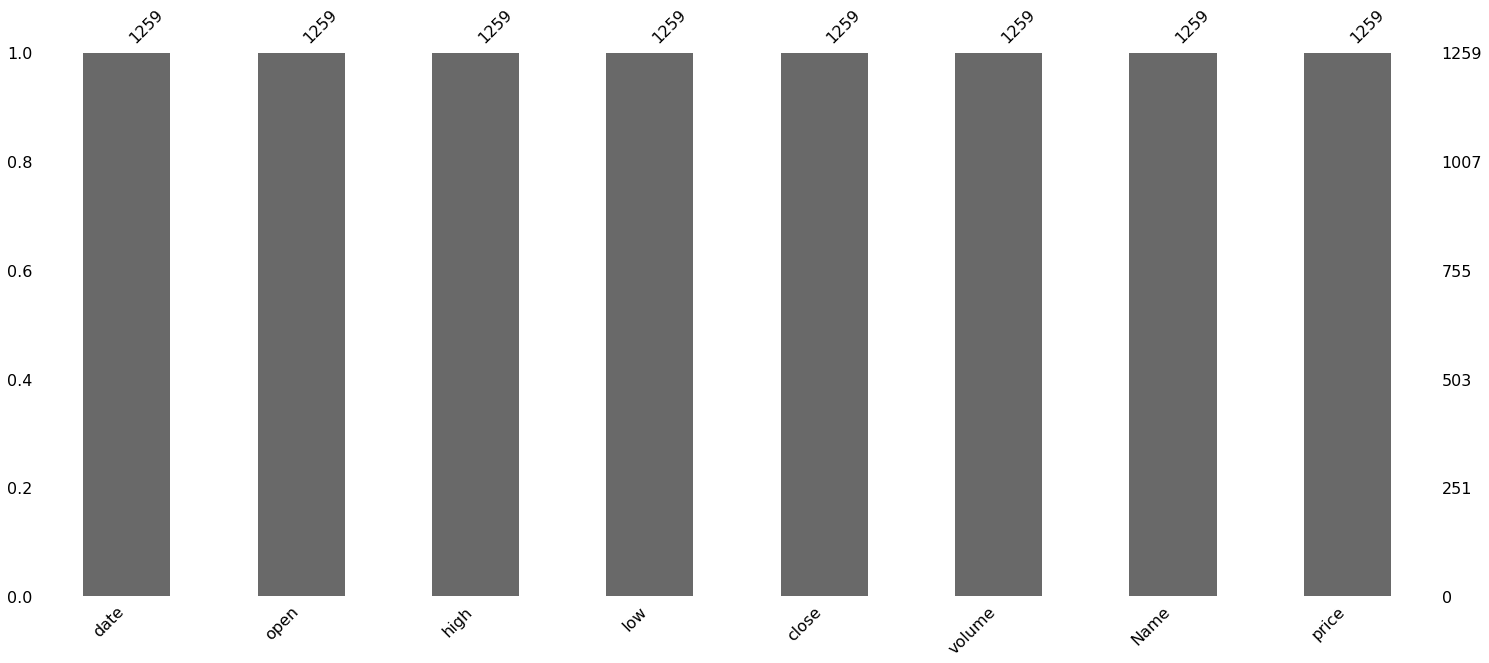

In [22]:
msno.bar(df1)

Since, all columns have same number of parameters, thus no need to remove null values

Observing the trend of apple stock price overtime - HISTOGRAM

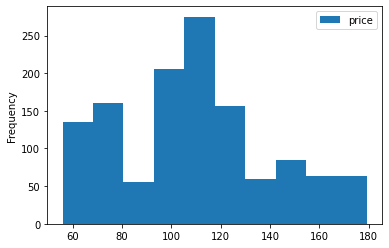

In [23]:
df1.plot(x="date",y="price", subplots=True,kind="hist")
plt.show()

LINEGRAPH

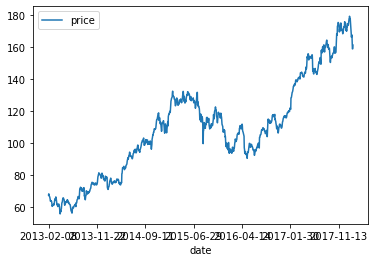

In [24]:
df1.plot(x="date",y="price", subplots=True,kind="line")
plt.show()

We have calculated the log difference. The advantage of this computation of evaluating change is that the computations are symmetrical in both directions.

In [25]:
df1['log_diff'] = np.log(df1['price']) - np.log(df1['open'])
df1.head()

C:\Users\clazar5\AppData\Local\Temp/ipykernel_36628/3530275720.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['log_diff'] = np.log(df1['price']) - np.log(df1['open'])


,date,open,high,low,close,volume,Name,price,log_diff
1259,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,67.715650,0.000021
1260,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,68.379250,0.004512
1261,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,67.769025,-0.010749
1262,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,66.824200,0.001198
1263,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,66.670275,0.004666


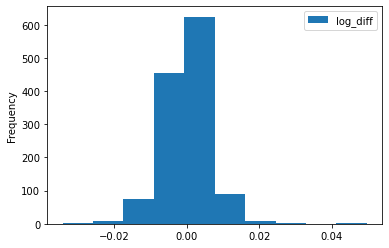

In [26]:
df1.plot(x="date",y="log_diff", subplots=True,kind="hist")
plt.show()

<AxesSubplot:>

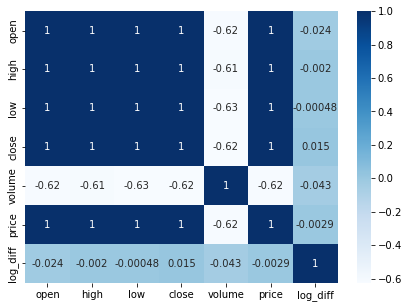

In [27]:
plt.figure(figsize=(7,5))
sns.heatmap(df1.corr(),cmap='Blues',annot=True)

Since, The correlation is 1 for open, close, high and low prices, thus we are creating differences of these variables for further EDA

In [28]:
df1['open-high'] = df1['open']-df1['high']
df1['open-low'] = df1['open'] - df1['low']
df1['close-high'] = df1['close']-df1['high']
df1['close-low'] = df1['close'] -df1['low']
df1['high-low'] = df1['high'] - df1['low']
df1['open-close'] = df1['open'] - df1['close']
df1.head()

C:\Users\clazar5\AppData\Local\Temp/ipykernel_36628/3377888188.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['open-high'] = df1['open']-df1['high']
C:\Users\clazar5\AppData\Local\Temp/ipykernel_36628/3377888188.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['open-low'] = df1['open'] - df1['low']
C:\Users\clazar5\AppData\Local\Temp/ipykernel_36628/3377888188.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

,date,open,high,low,close,volume,Name,price,log_diff,open-high,open-low,close-high,close-low,high-low,open-close
1259,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,67.715650,0.000021,-0.6872,0.8214,-0.5472,0.9614,1.5086,-0.1400
1260,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,68.379250,0.004512,-1.2057,0.4643,-0.7157,0.9543,1.6700,-0.4900
1261,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,67.769025,-0.010749,-0.4100,1.6809,-2.0686,0.0223,2.0909,1.6586
1262,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,66.824200,0.001198,-0.9186,0.5700,-0.9472,0.5414,1.4886,0.0286
1263,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,66.670275,0.004666,-1.0172,0.0714,-0.7215,0.3671,1.0886,-0.2957


In [29]:
df3=df1.copy()
df3 = df3.drop(['open','high','low','close'] , axis=1)
df3.head()

,date,volume,Name,price,log_diff,open-high,open-low,close-high,close-low,high-low,open-close
1259,2013-02-08,158168416,AAPL,67.715650,0.000021,-0.6872,0.8214,-0.5472,0.9614,1.5086,-0.1400
1260,2013-02-11,129029425,AAPL,68.379250,0.004512,-1.2057,0.4643,-0.7157,0.9543,1.6700,-0.4900
1261,2013-02-12,151829363,AAPL,67.769025,-0.010749,-0.4100,1.6809,-2.0686,0.0223,2.0909,1.6586
1262,2013-02-13,118721995,AAPL,66.824200,0.001198,-0.9186,0.5700,-0.9472,0.5414,1.4886,0.0286
1263,2013-02-14,88809154,AAPL,66.670275,0.004666,-1.0172,0.0714,-0.7215,0.3671,1.0886,-0.2957


<AxesSubplot:>

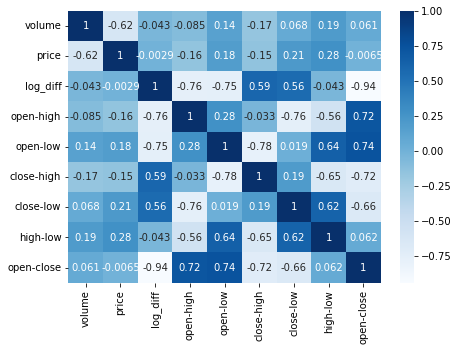

In [30]:
plt.figure(figsize=(7,5))
sns.heatmap(df3.corr(),cmap='Blues',annot=True)

<AxesSubplot:xlabel='open-high', ylabel='volume'>

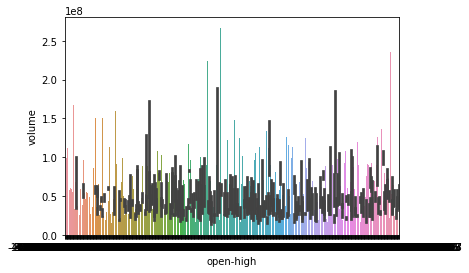

In [31]:
sns.barplot(x = df3["open-high"], y=df3["volume"])

<AxesSubplot:xlabel='high-low', ylabel='volume'>

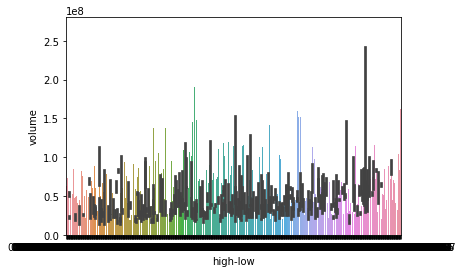

In [32]:
sns.barplot(x = df3["high-low"], y=df3["volume"])

<AxesSubplot:xlabel='open-low', ylabel='volume'>

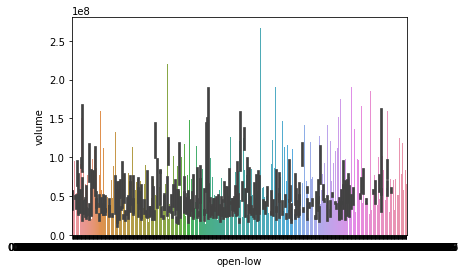

In [33]:
sns.barplot(x = df3["open-low"], y=df3["volume"])

<AxesSubplot:xlabel='close-high', ylabel='volume'>

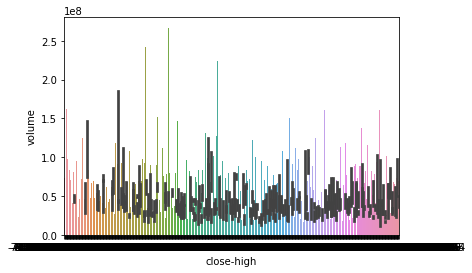

In [34]:
sns.barplot(x = df3["close-high"], y=df3["volume"])

<AxesSubplot:xlabel='close-low', ylabel='volume'>

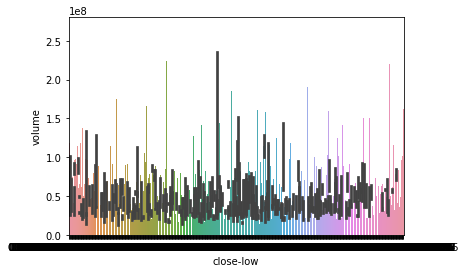

In [35]:
sns.barplot(x = df3["close-low"], y=df3["volume"])

<AxesSubplot:xlabel='open-close', ylabel='volume'>

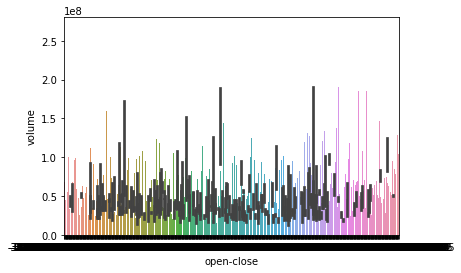

In [36]:
sns.barplot(x = df1["open-close"], y=df1["volume"])

#Baseline Model: **Linear Regression**

In [37]:
df5=df1.copy()
df5 = df5.drop(['open-high','open-low','close-high','close-low', 'high-low','open-close','log_diff','price'],axis=1)
df5.head()

,date,open,high,low,close,volume,Name
1259,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1260,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
1261,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
1262,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
1263,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


Libraries required for this model

In [38]:
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt 
import seaborn 

In [39]:
df5 = df5.dropna()
df5 = df5.reset_index(drop=True)
df5.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


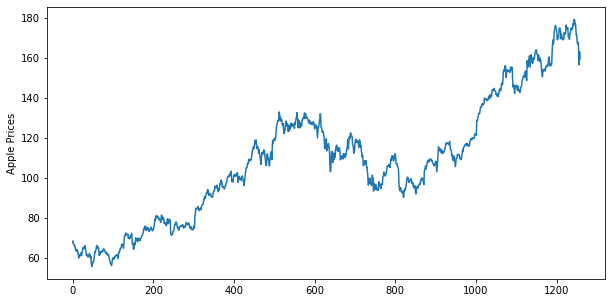

In [40]:
df5=df5[['close']] 
# Drop rows with missing values 
df5= df5.dropna() 
# Plot the closing price of Apple 
df5.close.plot(figsize=(10,5)) 
plt.ylabel("Apple Prices")
plt.show()

**Define explanatory variables**

An explanatory variable is a variable that is manipulated to determine the value of the AAPL price the next day. Simply, they are the features which we want to use to predict the AAPL price. The explanatory variables in this strategy are the moving averages for past 3 days and 9 days. We drop the NaN values using dropna() function and store the feature variables in X.

In [41]:
df5.head(5)

,close
0,67.8542
1,68.5614
2,66.8428
3,66.7156
4,66.6556


In [42]:
df5['S_3'] = df5['close'].shift(1).rolling(window=3).mean() 
df5['S_9']= df5['close'].shift(1).rolling(window=9).mean() 
df5= df5.dropna() 
X = df5[['S_3','S_9']]
X.head()

,S_3,S_9
9,64.519000,66.213744
10,64.081867,65.830100
11,63.793767,65.240733
12,63.932333,64.940256
13,63.635167,64.584067


#Dependent variable ie Closing price

In [43]:
y = df5['close']
y.head()

9     64.4014
10    63.2571
11    64.1385
12    63.5099
13    63.0571
Name: close, dtype: float64

Split data (80% train, 20% test)

In [44]:
t=0.8
t = int(t*len(df5)) 
# Train dataset 
X_train = X[:t] 
y_train = y[:t]  
# Test dataset 
X_test = X[t:] 
y_test = y[t:]

#Modeling

In [45]:
from sklearn.linear_model import LinearRegression 
linear = LinearRegression().fit(X_train,y_train)

model = linear.fit(X, y)

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: 0.3255684517967268
Coefficients: [ 1.21289267 -0.21492898]


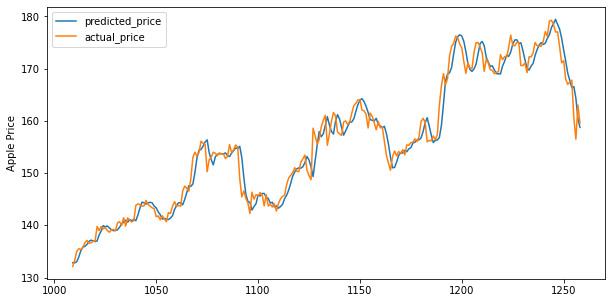

In [46]:
predicted_price = linear.predict(X_test)  
predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['price'])  
predicted_price.plot(figsize=(10,5))  
y_test.plot()  
plt.legend(['predicted_price','actual_price'])  
plt.ylabel("Apple Price")  
plt.show()

In [47]:
from sklearn.metrics import mean_squared_error 
from math import sqrt
#calculate rmse
error_final = sqrt(mean_squared_error(y_test,predicted_price)) 
print(error_final)

2.237673523705216


In [48]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predicted_price)
print(r2)

0.9661062485871623


In [49]:
import statsmodels.api as sm
X = sm.add_constant(X)

olsmod = sm.OLS(y, X).fit()
print(olsmod.summary())

                            OLS Regression Results                            
Dep. Variable:                  close   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 1.543e+05
Date:                Sun, 01 May 2022   Prob (F-statistic):               0.00
Time:                        09:25:12   Log-Likelihood:                -2596.2
No. Observations:                1250   AIC:                             5198.
Df Residuals:                    1247   BIC:                             5214.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3256      0.204      1.595      0.1

C:\Users\clazar5\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


F test (Anova)

In [50]:
print('F-statistic:', olsmod.fvalue)
print('Probability of observing value at least as high as F-statistic:', olsmod.f_pvalue)

F-statistic: 154271.4419180826
Probability of observing value at least as high as F-statistic: 0.0


Because our f_pvalue is lower than 0.05 we can conclude that our model performs better than other simpler model.

T test

In [51]:
print(olsmod.pvalues)

const     1.109259e-01
S_3      1.931957e-229
S_9       1.453057e-12
dtype: float64


Both of our independent variables, S_3 and S_9, have p-value less than 0.05 which shows that there is sufficient evidence that S_3 and S_3 affects our closing price.

Linearity testing

In [52]:
df_new = pd.DataFrame(y_test)
df_new['pred'] = predicted_price
df_new.head(5)

,close,pred
1009,132.120,132.826000
1010,133.290,132.814024
1011,135.020,133.034257
1012,135.510,133.935697
1013,135.345,135.139576


C:\Users\clazar5\Anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


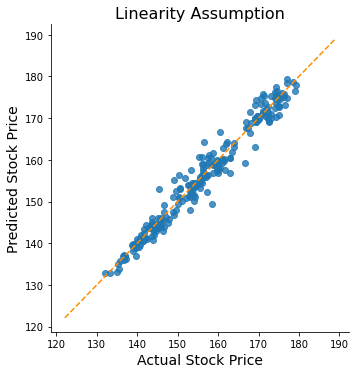

In [53]:
sns.lmplot(x='close', y='pred', data=df_new, fit_reg=False, size=5)
    
# Plotting the diagonal line
line_coords = np.arange(df_new.min().min()-10, 
                        df_new.max().max()+10)
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')

plt.ylabel('Predicted Stock Price', fontsize=14)
plt.xlabel('Actual Stock Price', fontsize=14)
plt.title('Linearity Assumption', fontsize=16)
plt.show()

The scatter plots show residual point evenly spread around the diagonal line, so we can assume that there is linear relationship between our independent and dependent variables.

#1st Model: **KNN**

In [54]:
# Importing important libraries
import numpy as np

from collections import OrderedDict
import csv

# Importing libraries to split and scale data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#Importing required packages for implementing KNN algorithm
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
df1.head()

,date,open,high,low,close,volume,Name,price,log_diff,open-high,open-low,close-high,close-low,high-low,open-close
1259,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,67.715650,0.000021,-0.6872,0.8214,-0.5472,0.9614,1.5086,-0.1400
1260,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,68.379250,0.004512,-1.2057,0.4643,-0.7157,0.9543,1.6700,-0.4900
1261,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,67.769025,-0.010749,-0.4100,1.6809,-2.0686,0.0223,2.0909,1.6586
1262,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,66.824200,0.001198,-0.9186,0.5700,-0.9472,0.5414,1.4886,0.0286
1263,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,66.670275,0.004666,-1.0172,0.0714,-0.7215,0.3671,1.0886,-0.2957


In [56]:
df4=df1.copy()
df4 = df4.drop(['open-high','open-low','close-high','close-low', 'high-low','open-close','log_diff','price'],axis=1)
df4.head()

,date,open,high,low,close,volume,Name
1259,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1260,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
1261,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
1262,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
1263,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [57]:
# Changing col types 
df4["date"] = pd.to_datetime(df4["date"])
df4[["open","high","low","close","volume"]]=df4[["open","high","low","close","volume"]].\
apply(pd.to_numeric)
df4.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

In [58]:
# Checking for null values
df4.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [59]:
# Droping null values
df4 = df4.dropna()
df4 = df4.reset_index(drop=True)
df4.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [60]:
df4.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [61]:
df4.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [62]:
# Spliting the data into training,validation and testing datasets
train , test = train_test_split(df4, random_state= 5, test_size = 0.2)
train , val = train_test_split(train, random_state = 5,test_size = 0.2)

x_train = train.drop(['date','close','volume'], axis=1)
y_train = train['close']

x_val= val.drop(['date','close','volume'], axis=1)
y_val = val['close']

x_test = test.drop(['date','close','volume'], axis = 1)
y_test = test['close']

In [63]:
#Checking the shape of the generated datasets
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)


(805, 4)
(805,)
(202, 4)
(202,)
(252, 4)
(252,)


In [64]:
# Scaling the input parameters
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train.iloc[:,[0,1,2]])
x_train = pd.DataFrame(x_train_scaled)

x_val_scaled = scaler.fit_transform(x_val.iloc[:,[0,1,2]])
x_val = pd.DataFrame(x_val_scaled)


x_test_scaled = scaler.fit_transform(x_test.iloc[:,[0,1,2]])
x_test = pd.DataFrame(x_test_scaled)

In [65]:
# Implementing KNN for different values of K and checking the RMSE value on validation dataset
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_val) #make prediction on test set
    error = sqrt(mean_squared_error(y_val,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 1.0178233324060217
RMSE value for k=  2 is: 1.0158019961323832
RMSE value for k=  3 is: 0.9648268105017221
RMSE value for k=  4 is: 0.9455661509846863
RMSE value for k=  5 is: 0.9360855145067172
RMSE value for k=  6 is: 0.9525186851087472
RMSE value for k=  7 is: 0.9709903015968334
RMSE value for k=  8 is: 0.978187972844754
RMSE value for k=  9 is: 0.9920962625475711
RMSE value for k=  10 is: 1.004498091402953
RMSE value for k=  11 is: 1.017753393758283
RMSE value for k=  12 is: 1.0313609204063818
RMSE value for k=  13 is: 1.0393952141497897
RMSE value for k=  14 is: 1.0609399254255347
RMSE value for k=  15 is: 1.0738311483973735
RMSE value for k=  16 is: 1.071668529195449
RMSE value for k=  17 is: 1.0758410886462892
RMSE value for k=  18 is: 1.0896057473596281
RMSE value for k=  19 is: 1.102341483191008
RMSE value for k=  20 is: 1.1167408807718686


Text(0.5, 1.0, 'Performace Under Varying K Values')

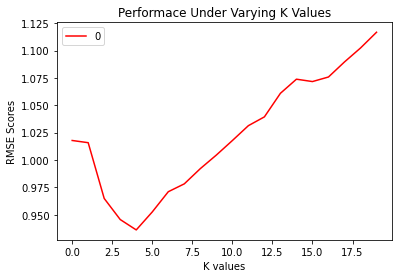

In [66]:
# Plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot(color='red')
plt.xlabel('K values')
plt.ylabel('RMSE Scores')
plt.title('Performace Under Varying K Values')  

In [67]:
# Obtaining the best value for K
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
model.best_params_

{'n_neighbors': 3}

In [68]:
# Training the model with K = 3 value and prediciting the y labels for test data
k = 3
model_final = neighbors.KNeighborsRegressor(n_neighbors = k)
model_final.fit(x_train, y_train)  #fit the model
pred_final=model_final.predict(x_test) #make prediction on test set
error_final = sqrt(mean_squared_error(y_test,pred_final)) #calculate rmse
rmse_val.append(error_final) #store rmse values
print('RMSE value for k= ' , k, 'is:', error_final)
r2 = r2_score(y_test, pred_final)
print("R square for k=", k, "is" ,r2)

RMSE value for k=  3 is: 0.9391094574200999
R square for k= 3 is 0.9990785071771179


#2nd Model: SVM

In [69]:
# Finding best paramaters and Kernel for SVR using GridSearchCV

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV


# Declaring the SVM parameters 
parameter_candidates = [
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]

# Using GridSearchCV to find best parameters employing K-fold cross-validation with K=5 
svr = SVR()
clf = GridSearchCV(svr, param_grid=parameter_candidates, cv=5 )
clf.fit(x_train, y_train)
print('Best score for data:', clf.best_score_)
print('Best C:',clf.best_estimator_.C) 
print('Best Kernel:',clf.best_estimator_.kernel)
print('Best Gamma:',clf.best_estimator_.gamma)

Best score for data: 0.9996698028752066
Best C: 1000
Best Kernel: linear
Best Gamma: 0.001


In [70]:
# Finding the RMSE and R-squared value of the model
y_pred_svm= clf.predict(x_test)
score_svm = clf.score(x_test,y_test)
print("R-squared val:", score_svm)
print("RMSE test:", sqrt(mean_squared_error(y_pred_svm, y_test)))


R-squared val: 0.9994426786441096
RMSE test: 0.7303366215479065


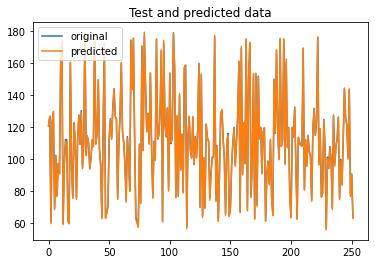

In [71]:
# Plotting the predicted and true values

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred_svm, label="predicted")
plt.title("Test and predicted data")
plt.legend()
plt.show()

# 3rd model: LSTM

In [81]:
df6=df1.copy()
df6 = df6.drop(['open-high','open-low','close-high','close-low', 'high-low','open-close','log_diff','price'],axis=1)
df6.head()

,date,open,high,low,close,volume,Name
1259,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1260,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
1261,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
1262,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
1263,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [83]:
df6.count()

date      1259
open      1259
high      1259
low       1259
close     1259
volume    1259
Name      1259
dtype: int64

In [84]:
model_data = df6[['date','close']]

#Data Preprocessing

del model_data['date']

#Train and Test Split
close_df = np.array(model_data).reshape(-1,1)
training_size = int(len(close_df)*0.65)
test_size = len(close_df)-training_size

train_data,test_data = close_df[0:training_size,:],close_df[training_size:len(close_df),:1]
print('train_data_bitcoin: ', train_data.shape)
print('test_data_bitcoin: ', test_data.shape)


train_data_bitcoin:  (818, 1)
test_data_bitcoin:  (441, 1)


In [86]:
#A function to add a time step below.
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]  
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 10 
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)


# reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (807, 10, 1)
X_test:  (430, 10, 1)


In [87]:
model = Sequential() 
# Adding a LSTM layer with 2 internal units
model.add(LSTM(2,input_shape=(None,1),activation='relu'))
# Adding a Dense layer with 1 units.
model.add(Dense(1))
# Loss function + optimizer
model.compile(loss='mean_squared_error',optimizer='adam')

In [88]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=10,verbose=1)
print ("--------------------------------------------------------------------------------------------------------------\n")

Epoch 1/100
81/81 [==============================] - 2s 11ms/step - loss: 6450.0552 - val_loss: 10256.4268
Epoch 2/100
81/81 [==============================] - 1s 7ms/step - loss: 3630.3987 - val_loss: 4325.1499
Epoch 3/100
81/81 [==============================] - 1s 8ms/step - loss: 1004.8840 - val_loss: 441.5609
Epoch 4/100
81/81 [==============================] - 1s 8ms/step - loss: 49.9065 - val_loss: 6.4178
Epoch 5/100
81/81 [==============================] - 1s 7ms/step - loss: 3.5262 - val_loss: 4.4344
Epoch 6/100
81/81 [==============================] - 1s 7ms/step - loss: 3.5087 - val_loss: 4.4867
Epoch 7/100
81/81 [==============================] - 1s 8ms/step - loss: 3.5102 - val_loss: 4.5567
Epoch 8/100
81/81 [==============================] - 1s 8ms/step - loss: 3.5059 - val_loss: 4.4767
Epoch 9/100
81/81 [==============================] - 1s 8ms/step - loss: 3.5067 - val_loss: 4.4750
Epoch 10/100
81/81 [==============================] - 1s 8ms/step - loss: 3.5110 - val_lo

In [89]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
look_back=time_step
trainPredictPlot = np.empty_like(close_df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(close_df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(close_df)-1, :] = test_predict
names = cycle(['Original','Train','Test predicted'])
plotdf = pd.DataFrame({'date': df6['date'],
                       'original_close': df6['close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})
fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})

fig.update_layout(title_text='Original vs Predicted Price',
                  plot_bgcolor='white',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [90]:
#RMSE VALUE
from sklearn.metrics import mean_squared_error 
from math import sqrt
#calculate rmse
error_final = sqrt(mean_squared_error(y_test,test_predict)) 
print(error_final)

1.9757590835358187


In [91]:
#R-Square VALUE
from sklearn.metrics import r2_score
coefficient_of_dermination = r2_score(y_test,test_predict)
print(coefficient_of_dermination)

0.99387570122399
